In [1]:
import pandas as pd

In [7]:
df =pd.read_csv(r"D:/PYTHON_NOTES/CSV/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [9]:
df.shape

(891, 12)

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df.isna().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Gender          0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Age', ylabel='Density'>

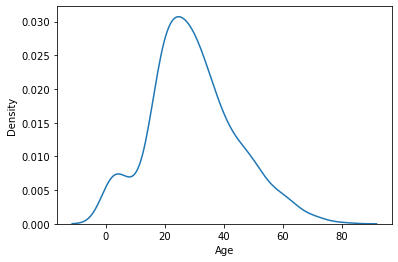

In [14]:
import seaborn as sns
sns.kdeplot(df['Age'])

In [15]:
df['Age'].mean()

29.69911764705882

<AxesSubplot:xlabel='Age', ylabel='Density'>

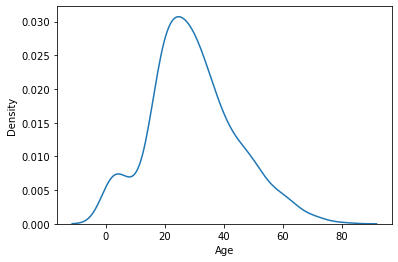

In [17]:
df['Age2']=df['Age'].fillna(df['Age'].mean())
sns.kdeplot(df['Age'])

In [10]:
import numpy as np
df = pd.DataFrame({"A":[40,20,30,42,np.nan,200,10,50,60],
                  "B":[10,12,13,14,15,16,14,15,13],
                  "C":[1,2,3,4,5,6,4,2,3]})
df

,A,B,C
0,40.0,10,1
1,20.0,12,2
2,30.0,13,3
3,42.0,14,4
4,NaN,15,5
5,200.0,16,6
6,10.0,14,4
7,50.0,15,2
8,60.0,13,3


In [3]:
#  handle the outlier by imputation

In [11]:
df["A"].fillna(df['A'].mean()) 

0     40.0
1     20.0
2     30.0
3     42.0
4     56.5
5    200.0
6     10.0
7     50.0
8     60.0
Name: A, dtype: float64

In [9]:
#  handle the outlier by knn imputer
# firstly replace outlier value as np.NAN
then replace np.nan by knn imputer

In [7]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
array =knn_imputer.fit_transform(df)


In [8]:
array

array([[ 40.,  10.,   1.],
       [ 20.,  12.,   2.],
       [ 30.,  13.,   3.],
       [ 42.,  14.,   4.],
       [ 84.,  15.,   5.],
       [200.,  16.,   6.],
       [ 10.,  14.,   4.],
       [ 50.,  15.,   2.],
       [ 60.,  13.,   3.]])

In [21]:
df# here target columns for imputation is A

,A,B,C
0,40.0,10,1
1,20.0,12,2
2,30.0,13,3
3,42.0,14,4
4,NaN,15,5
5,200.0,16,6
6,10.0,14,4
7,50.0,15,2
8,60.0,13,3


In [22]:
df1 =pd.DataFrame(array,columns=df.columns)

In [23]:
df1

,A,B,C
0,40.0,10.0,1.0
1,20.0,12.0,2.0
2,30.0,13.0,3.0
3,42.0,14.0,4.0
4,84.0,15.0,5.0
5,200.0,16.0,6.0
6,10.0,14.0,4.0
7,50.0,15.0,2.0
8,60.0,13.0,3.0


In [ ]:
Note>> we imputate Nan=84 by knn and by normal imputation Nan=56 
>>>>>>which show majar diiference between two method

# Nan Eculidean Distance  use mean value

In [45]:
df1 = pd.DataFrame({"A":[40,5,43,np.nan,41,48,52],
                  "B":[10,18,13,16,20,np.nan,15],
                   "C":[1,5,1,2,8,3,9]})
df1 ####  if the data has scale very different so low scale data does not influeance in calculation of knn_imputation 
    ##    in that case first perform scaling then knn_imputation
    

,A,B,C
0,40.0,10.0,1
1,5.0,18.0,5
2,43.0,13.0,1
3,NaN,16.0,2
4,41.0,20.0,8
5,48.0,NaN,3
6,52.0,15.0,9


In [46]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import KNNImputer
knn_imputar =KNNImputer(n_neighbors=3)
array = knn_imputar.fit_transform(df1)

In [1]:
df= pd.DataFrame(array,columns=df.columns)

NameError: name 'pd' is not defined

In [48]:
df

,A,B,C
0,40.0,10.000000,1.0
1,5.0,18.000000,5.0
2,43.0,13.000000,1.0
3,32.0,16.000000,2.0
4,41.0,20.000000,8.0
5,48.0,14.666667,3.0
6,52.0,15.000000,9.0


In [49]:
Note NAN=32.0 ,14.66

SyntaxError: invalid syntax (<ipython-input-49-ff1400eebc7f>, line 1)

In [ ]:
we will cal  NAN=37.6 how Knnimutar  work in backend

In [ ]:
here target column is A for finding imputated value

In [50]:
df1

,A,B,C
0,40.0,10.0,1
1,5.0,18.0,5
2,43.0,13.0,1
3,NaN,16.0,2
4,41.0,20.0,8
5,48.0,NaN,3
6,52.0,15.0,9


,A,B
0,10.0,20
1,20.0,87
2,NaN,30
3,34.0,45
4,56.0,78


In [52]:
d0=np.sqrt(36+1)#(16-10)^2+(2-1)^2
print(d0)

d1=np.sqrt(4+9)#(16-18)^2+(2-5)^2
print(d1)

d2=np.sqrt(9+1)#(16-13)^2+(2-1)^2
print(d2)
#d3=np.sqrt() ignore
d4=np.sqrt(16+36)#(16-20)^2+(8-2)^2
print(d4)


#d5=np.sqrt()# ()     > weight concept will applicable because in feature col has nan value 
                      # we can't perform normal ecludin formula for distance

#distnace =np.sqrt(weight*Distnace^2)
#weight = total number of coordinate /present coordinate
#total number of coordinate>>B,C
#present coordinate i.e 1


d5=np.sqrt(2*1) #(2/1*(2-3)^2)
print(d5)

d6 =np.sqrt(1+49) #(16-15)^2+(2-9)^2
print(d6)

6.082762530298219
3.605551275463989
3.1622776601683795
7.211102550927978
1.4142135623730951
7.0710678118654755


In [ ]:
after cal of d1,...........dn
sort them in ascending order and pick k Enty >>> we take the k entry value target and field average

In [ ]:
we will order above value for k=3 ascending
1.41>d5>48+43+5
3.16>d2
3.60>d1

In [1]:
df1

NameError: name 'df1' is not defined

In [55]:
df

,A,B,C
0,40.0,10.000000,1.0
1,5.0,18.000000,5.0
2,43.0,13.000000,1.0
3,32.0,16.000000,2.0
4,41.0,20.000000,8.0
5,48.0,14.666667,3.0
6,52.0,15.000000,9.0


In [67]:
(48+43+5)/3

32.0

In [25]:
import pandas as pd
import numpy as np
x=pd.DataFrame({"A":[10,20,np.nan,34,56],"B":[20,87,30,45,78]})

In [26]:
from sklearn.impute import KNNImputer

In [27]:
knn = KNNImputer()
knn.fit_transform(x)

In [6]:
pd.DataFrame(y,columns=x.columns)

NameError: name 'x' is not defined

In [13]:
import pandas as pd
import numpy as np

y=pd.DataFrame({'A':[14,67,89,np.nan],'B':[89,35,np.nan,34]})
y

,A,B
0,14.0,89.0
1,67.0,35.0
2,89.0,NaN
3,NaN,34.0


In [8]:
from sklearn.impute import KNNImputer


In [12]:
jnn= KNNImputer()
jnn.fit_transform(y)

array([[14.        , 89.        ],
       [67.        , 35.        ],
       [89.        , 52.66666667],
       [56.66666667, 34.        ]])